In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Ex 1

In [82]:
def y1(x: int):
    y = x+1
#     y = x+4
    return (x, y)

def y2(x: int):
    y = 4-x
#     y = 4-2*x
    return (x, y)

def y3(x: int):
    y = 2*x-1
    return (x, y)

def get_direction(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    direction = np.array([x2-x1, y2-y1])
    direction = direction / np.sqrt((direction**2).sum())
    return direction


def intersect(P0, P1):
    rot = np.array([[0, -1], [1, 0]])
    
    sum1 = None
    sum2 = None
    
    for v1, v2 in zip(P0, P1):
        normed = (v2-v1)/np.linalg.norm(v2-v1)
        ni = (rot@normed.T)[:, np.newaxis]
        
        if sum1 is None:
            sum1 = ni@ni.T
            sum2 = (ni@ni.T)@v1
        else:
            sum1 += ni@ni.T
            sum2 += (ni@ni.T)@v1
    x = np.linalg.inv(sum1)@sum2
    return x

In [83]:
x_0 = 1
x_1 = 3
point1 = y1(x=x_0)
direction1 = get_direction(point1, y1(x_1))

point2 = y2(x=x_0)
direction2 = get_direction(point2, y2(x_1))

point3 = y3(x=x_0)
direction3 = get_direction(point3, y3(x_1))


P0 = np.array([
    point1,
    point2,
    point3
])
P1 = np.array([
    y1(x_1),
    y2(x_1),
    y3(x_1)
])


intersection_point = intersect(P0, P1)
intersection_point

array([1.6 , 2.45])

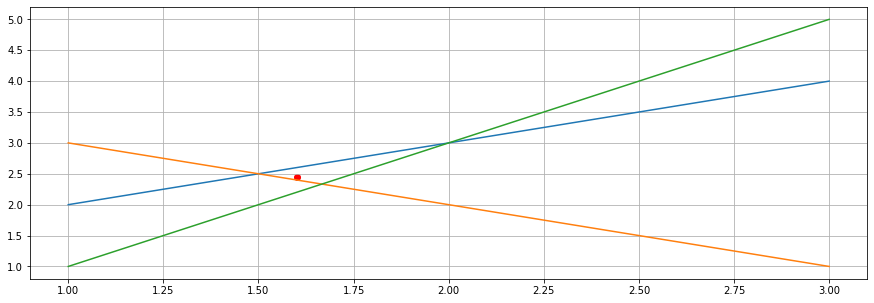

In [84]:
plt.figure(figsize=(15, 5))

l1 = np.array([point1, y1(x_1)])
plt.plot(l1[:, 0], l1[:, 1])

l2 = np.array([point2, y2(x_1)])
plt.plot(l2[:, 0], l2[:, 1])

l3 = np.array([point3, y3(x_1)])
plt.plot(l3[:, 0], l3[:, 1])

plt.scatter(intersection_point[0], intersection_point[1], c='r')
plt.grid()

# Ex 2

In [3]:
vectors = np.array([
    [19, 43, 25],
    [9, 21, 15],
    [12, 29, 18],
    [21, 46, 27],
    [-4, -4, 2],
    [24, 51, 30],
    [5, 14, 11]
]).T
vectors

array([[19,  9, 12, 21, -4, 24,  5],
       [43, 21, 29, 46, -4, 51, 14],
       [25, 15, 18, 27,  2, 30, 11]])